## Use Case

Objective Statement: Get business insight about airline prices.
    
Challenges: Large size of data, can not maintain by excel spreadsheet. Need several parameters to check at a same time.
    
Methodology / Analytic Technique:Use various EDA methods to get the insight information regarding the features.
    
Business Benefit: Helping Business Development Team to create predictions based on the characteristic for each parameter. 
    
Expected Outcome: Predicting prices based on the different variables. 

Business Understanding: Airline companies use complex algorithms to calculate flight prices given various conditions present at that particular time. These methods take financial, marketing, and various social factors into account to predict flight prices.

Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.
    
Data Understanding: The dataset has 13354 rows and 14 columns.

Data preparation: Python Version: 3.7.6 Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and imblearn

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [2]:
#Importing training dataset
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head() # Displaying top 5 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Importing test dataset
test_df = pd.read_excel('Test_set.xlsx')
test_df.head() # Displaying top 5 records and we can check that price colum will not be there as it is a test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
# Merging datasets 
final_df=train_df.append(test_df)
final_df.to_numpy()
final_df.head() # Displaying top 5 records


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df.tail() # Displaying last 5 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


Here we can see that the Price column has NaN values as test dataset was not having price column

In [6]:
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
## Feature Engineering Process
#Extracting Date, Month and Year separately from Date_of_journey feature
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [8]:
final_df.head(3) #Displaying top 3 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [9]:
#Converting data types of the variables
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [10]:
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [11]:
final_df.drop('Date_of_Journey', axis=1,inplace=True)  #Dropping as already created new features
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [12]:
# Removing gap in between Arrival_time column
final_df["Arrival_Time"] = final_df['Arrival_Time'].str.split(' ').str[0]

In [13]:
# Checking if we have any null values
final_df.isnull().sum() 

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [14]:
#Extracting Hour and Minute separately from Arrival_Time feature
final_df["Arrival_hour"] = final_df['Arrival_Time'].str.split(':').str[0]
final_df["Arrival_min"] = final_df['Arrival_Time'].str.split(':').str[1]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [15]:
#Converting data types of the variables
final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [16]:
# Droping Arrival_time as we already created new columns for time
final_df.drop('Arrival_Time', axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [17]:
#Extracting Hour and Minute separately from Deperature time feature
final_df["Dep_hour"] = final_df['Dep_Time'].str.split(':').str[0]
final_df["Dep_min"] = final_df['Dep_Time'].str.split(':').str[1]
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int) #Converting data types of the variables
final_df['Dep_min'] = final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time', axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [18]:
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [19]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [20]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'2 stops':1, '1 stop':2, '3 stops':3, 'nan':1, '4 stops':4})

In [21]:
final_df.head() # Displaying top 5 records

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [22]:
final_df.drop('Route',axis = 1, inplace=True) #Dropping as already created new feature
final_df.head() # Displaying top 5 records

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [23]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
final_df['Duration_hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df.head() # Displaying top 5 records

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [25]:
final_df[final_df['Duration_hour']=='5m'] #Printing columns which have value as 5minutes in Flight duration

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,1.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [26]:
#Dropping as having value which is not possible
final_df.drop(6474, axis = 0, inplace = True)
final_df.drop(2660, axis = 0, inplace = True)

In [27]:
final_df['Duration_hour'] = final_df['Duration_hour'].astype(int) #Converting data types of the variables
final_df.drop('Duration', axis = 1, inplace = True) #Dropping as already created new feature  
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_hour     13351 non-null  int32  
 10  Arrival_min      13351 non-null  int32  
 11  Dep_hour         13351 non-null  int32  
 12  Dep_min          13351 non-null  int32  
 13  Duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [28]:
final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [29]:
# Converting the labels into a numeric form so as to convert them into the machine-readable form
labelencoder = LabelEncoder()
final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Additional_Info'])
final_df.head(3) # Displaying top 3 records

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,1.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,1.0,8,13882.0,9,6,2019,4,25,9,25,19


In [30]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_min',
       'Dep_hour', 'Dep_min', 'Duration_hour'],
      dtype='object')

In [31]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\srusti\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srusti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


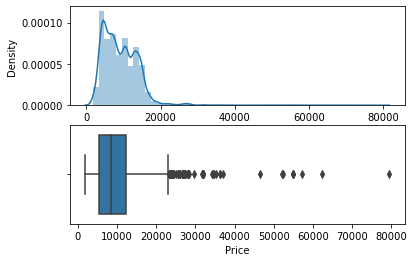

In [32]:
plot(final_df,'Price')

C:\Users\srusti\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srusti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


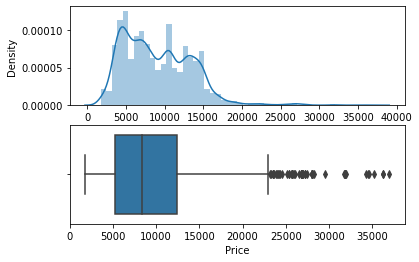

In [33]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])
plot(final_df,'Price')

In [34]:
final_df.describe() # Showing data's statistical features

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
count,13351.000000,13351.000000,13351.000000,13350.000000,13351.000000,10681.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,3.977530,1.953786,1.435248,1.212285,7.407610,9044.771557,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,10.234964
std,2.363982,1.178474,1.473404,0.909262,1.198494,4386.796808,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,8.473072
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000
50%,4.000000,2.000000,1.000000,2.000000,8.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000
75%,4.000000,3.000000,2.000000,2.000000,8.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,36983.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000


In [35]:
final_df.isnull().sum() #Checking for null values

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price              2670
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Duration_hour         0
dtype: int64

In [36]:
final_df.dropna(inplace=True) #Droping null variables 

In [37]:
final_df.isnull().sum() #Checking for null values

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Duration_hour      0
dtype: int64

In [38]:
print(final_df[final_df['Price'].isnull()]) #Checking for null values

Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Additional_Info, Price, Date, Month, Year, Arrival_hour, Arrival_min, Dep_hour, Dep_min, Duration_hour]
Index: []


In [39]:
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10680 non-null  int32  
 1   Source           10680 non-null  int32  
 2   Destination      10680 non-null  int32  
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10680 non-null  int32  
 5   Price            10680 non-null  float64
 6   Date             10680 non-null  int32  
 7   Month            10680 non-null  int32  
 8   Year             10680 non-null  int32  
 9   Arrival_hour     10680 non-null  int32  
 10  Arrival_min      10680 non-null  int32  
 11  Dep_hour         10680 non-null  int32  
 12  Dep_min          10680 non-null  int32  
 13  Duration_hour    10680 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 750.9 KB


In [40]:
# Converting to numeric type
final_df['Price'] = pd.to_numeric(final_df['Price'], errors='coerce')
final_df['Total_Stops'] = pd.to_numeric(final_df['Total_Stops'], errors='coerce')

In [41]:
# Dropping null values from the columns
final_df = final_df.dropna(subset=['Price'])
final_df = final_df.dropna(subset=['Total_Stops'])

In [42]:
final_df['Price'] = final_df['Price'].astype(int)
final_df['Total_Stops'] = final_df['Total_Stops'].astype(int)
final_df.info() # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10680 non-null  int32
 1   Source           10680 non-null  int32
 2   Destination      10680 non-null  int32
 3   Total_Stops      10680 non-null  int32
 4   Additional_Info  10680 non-null  int32
 5   Price            10680 non-null  int32
 6   Date             10680 non-null  int32
 7   Month            10680 non-null  int32
 8   Year             10680 non-null  int32
 9   Arrival_hour     10680 non-null  int32
 10  Arrival_min      10680 non-null  int32
 11  Dep_hour         10680 non-null  int32
 12  Dep_min          10680 non-null  int32
 13  Duration_hour    10680 non-null  int32
dtypes: int32(14)
memory usage: 667.5 KB


In [44]:
# Building Select K best function
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(final_df.drop('Price',axis=1),final_df['Price'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(final_df.drop('Price',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
7,Year,1458.451050
3,Total_Stops,225.953781
1,Source,171.935242
2,Destination,100.657257
0,Airline,76.655579
4,Additional_Info,51.932579
6,Month,17.725941
12,Duration_hour,16.949415
8,Arrival_hour,4.791587
11,Dep_min,3.730665


In [45]:
#We can see that Year is having highest values so, we can keep threshold of 50
cols=fscores[fscores['Score']>100]['Attribute']
print(cols)

1         Source
2    Destination
3    Total_Stops
7           Year
Name: Attribute, dtype: object


In [46]:
#Seperating dependent and independent variables
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [47]:
# standard scalar transforms the data in such a manner that it has mean as 0 and standard deviation as 1
sc = StandardScaler()

In [48]:
X = sc.fit_transform(X)

In [49]:
#Splitting data in train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50,test_size=0.20)
X_train

array([[ 0.0142518 ,  0.89022384, -0.97370451, ...,  0.78432342,
        -1.30048504,  1.26639279],
       [-1.26124475,  1.73972264,  1.06042815, ...,  1.48010995,
        -1.03405661, -1.08843567],
       [ 0.86458284,  0.04072504, -0.29566029, ..., -0.78119629,
         0.83094236,  0.20671998],
       ...,
       [ 0.86458284,  0.04072504, -0.29566029, ..., -0.60724965,
         1.09737078,  0.20671998],
       [-1.26124475, -0.80877376,  1.73847237, ..., -0.25935639,
         0.83094236, -0.97069424],
       [-1.68641026, -1.65827256,  2.41651659, ...,  1.82800322,
         0.03165709, -0.97069424]])

In [50]:
#Building Decision Tress Regressor
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train) #fitting and training the model with traning values
dt_pred_train = dt.predict(X_train)

In [51]:
dt.score(X_test, y_test)

0.8294981023664028

In [52]:
#Building Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [53]:
#Evaluating on Training set
y_pred = rfr.predict(X_test)

In [54]:
rfr.score(X_test, y_test)#Printing evaluation score usinf f-test for test data

0.8928786700598491

In [55]:
#Building Xgboost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train) #fitting and training the model with traning values
y_pred = xgb_model.predict(X_test)

In [56]:
xgb_model.score(X_test, y_test)

0.9062554072058988

## Conclusion

As per the above models we can say, that extreme gradiant boosting model is performing good. So, we can use the same model for our predictions.